In [32]:
import truss
from PIL import Image
import numpy as np
from PIL import ImageOps

In [33]:
## Text to Image Truss

In [34]:
sd_txt = truss.load("./sd_v2-1_truss/")

In [133]:
first_request = {"prompt": "dog running on the beach"}

In [134]:
def display_arr_img(I, fmt="RGB"):
    img = Image.fromarray(I, fmt)
    return img
    

In [135]:
response = sd_txt.predict(first_request)

  0%|          | 0/50 [00:00<?, ?it/s]

In [136]:
dog_img = display_arr_img(response["images"][0])

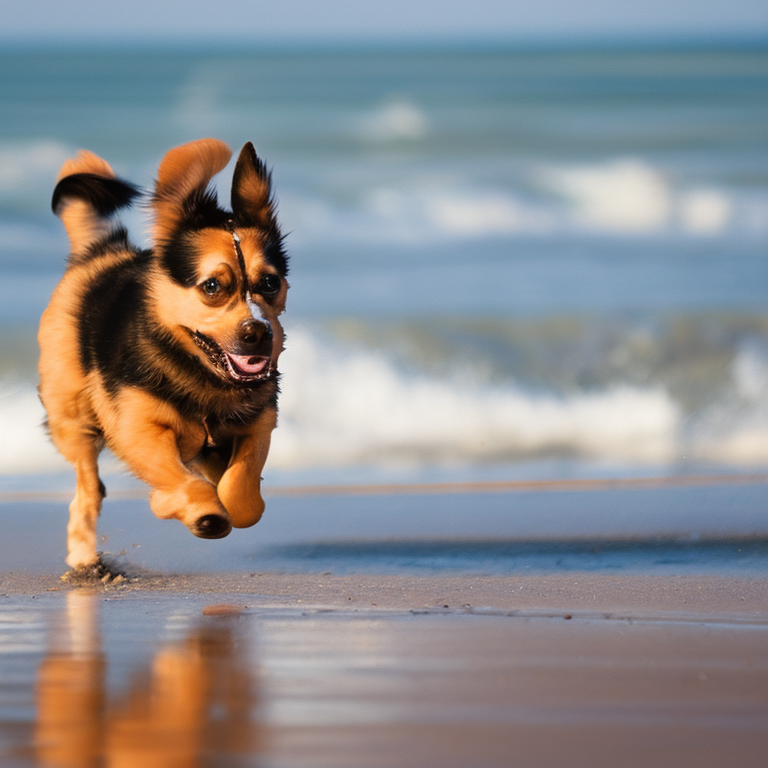

In [137]:
dog_img

In [84]:
## Segmentation Truss

In [138]:
seg_img = truss.load("./img_seg_truss")

In [139]:
# mask_res = seg_img.predict({"image": response["images"][0]})
mask_res = seg_img.predict({"image": response["images"][0]})


`label_ids_to_fuse` unset. No instance will be fused.


{'id': 1, 'label_id': 102, 'was_fused': False, 'score': 0.945543}
{'id': 2, 'label_id': 119, 'was_fused': False, 'score': 0.969004}
{'id': 3, 'label_id': 103, 'was_fused': False, 'score': 0.994845}
{'id': 4, 'label_id': 16, 'was_fused': False, 'score': 0.999632}


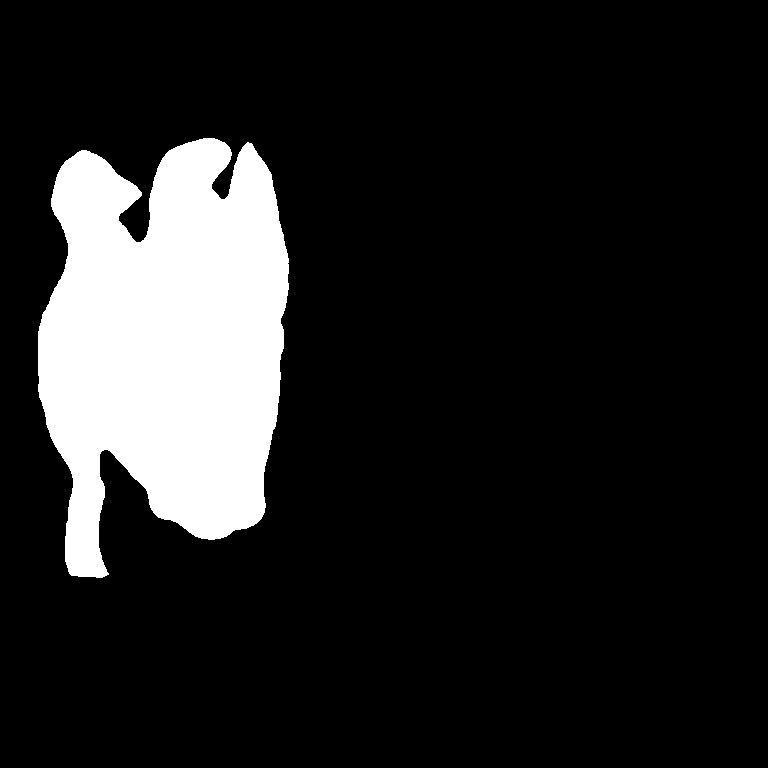

In [140]:
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.patches as mpatches
import torch

def generate_mask_numpy(desired_label, invert=False, segmentation=None, segments_info=None):
    label_id = 1
    # for each segment, draw its legend
    for segment in segments_info:
        if segment["label"] == desired_label:
            label_id = segment["id"]
            continue
    on = 0 if invert else 255
    off = 255 if invert else 0
    return Image.fromarray(segmentation).point(lambda p: on if p == label_id else off)

mask = generate_mask_numpy("dog", False, **mask_res)
mask

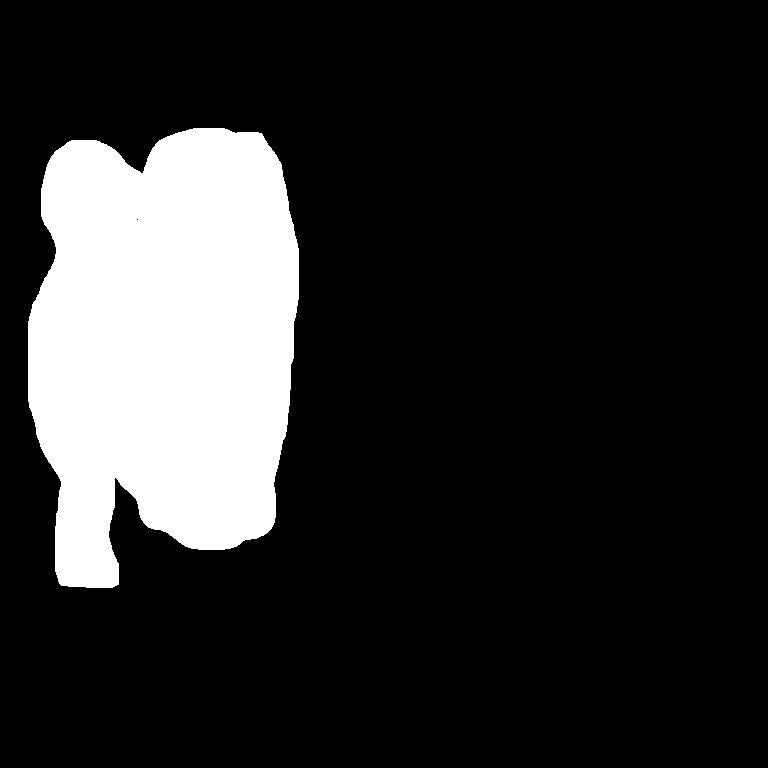

In [142]:
from PIL import ImageFilter
# mask2 = mask.filter(ImageFilter.MinFilter(81))
mask2 = mask.filter(ImageFilter.MaxFilter(21))
mask2

In [100]:
type(dog_img)

PIL.Image.Image

In [ ]:
## Inpainting Truss

In [97]:
import PIL
import requests
import torch
from io import BytesIO

from diffusers import StableDiffusionInpaintPipeline

pipe = StableDiffusionInpaintPipeline.from_pretrained("stabilityai/stable-diffusion-2-inpainting", torch_dtype=torch.float16)
pipe = pipe.to("cuda")

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

In [143]:

prompt = "cat running on the beach"
image = pipe(prompt=prompt,  image=dog_img.resize((512,512)), mask_image=mask2.resize((512,512))).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

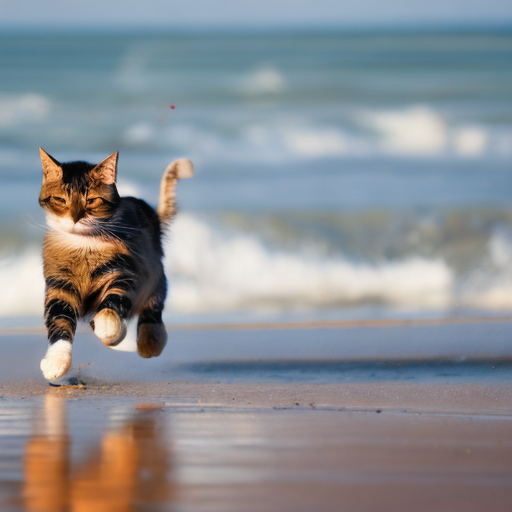

In [144]:
image